In [28]:
import pandas as pd 
import numpy as np

df = pd.read_csv('../data/final_df_2.csv')
df.drop(['ID','workclass'], axis=1, inplace=True)
df

,NAME_EDUCATION_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,DAYS_EMPLOYED,age,occupation,capital,hours-per-week,credit_decision
0,Higher education,M,Y,Y,427500.00,Working,Civil marriage,-4542,36.33,Adm-clerical,509.39,39.45,1
1,Higher education,M,Y,Y,427500.00,Working,Civil marriage,-4542,36.33,Craft-repair,509.39,39.45,1
2,Secondary / secondary special,M,Y,Y,112500.00,Working,Married,-1134,38.14,Craft-repair,440.54,39.55,-1
3,Secondary / secondary special,F,N,Y,270000.00,Commercial associate,Single / not married,-3051,38.14,Adm-clerical,440.54,39.55,-1
4,Secondary / secondary special,F,N,Y,270000.00,Commercial associate,Single / not married,-3051,38.14,Craft-repair,440.54,39.55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,Secondary / secondary special,M,Y,Y,315000.00,Working,Married,-2420,38.14,Sales,440.54,39.55,-1
36453,Higher education,F,N,Y,157500.00,Commercial associate,Married,-1325,36.33,Adm-clerical,509.39,39.45,-1
36454,Higher education,F,N,Y,157500.00,Pensioner,Married,-1325,36.33,Exec-managerial,509.39,39.45,-1
36455,Secondary / secondary special,F,N,Y,283500.00,Working,Married,-655,38.14,Craft-repair,440.54,39.55,-1


In [29]:
df.describe()

,AMT_INCOME_TOTAL,DAYS_EMPLOYED,age,capital,hours-per-week,credit_decision
count,36457.00,36457.00,36457.00,36457.00,36457.00,36457.00
mean,186685.74,59262.94,37.74,458.93,39.52,-0.40
std,101789.23,137651.33,1.25,75.06,0.14,0.86
min,27000.00,-15713.00,36.33,228.91,38.74,-1.00
25%,121500.00,-3153.00,36.33,440.54,39.45,-1.00
50%,157500.00,-1552.00,38.14,440.54,39.55,-1.00
75%,225000.00,-408.00,38.14,509.39,39.55,1.00
max,1575000.00,365243.00,47.08,2635.63,43.30,1.00


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NAME_EDUCATION_TYPE  36457 non-null  object 
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   AMT_INCOME_TOTAL     36457 non-null  float64
 5   NAME_INCOME_TYPE     36457 non-null  object 
 6   NAME_FAMILY_STATUS   36457 non-null  object 
 7   DAYS_EMPLOYED        36457 non-null  int64  
 8   age                  36457 non-null  float64
 9   occupation           36457 non-null  object 
 10  capital              36457 non-null  float64
 11  hours-per-week       36457 non-null  float64
 12  credit_decision      36457 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 3.6+ MB


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = df['credit_decision']
df.drop(['credit_decision'],axis=1,inplace=True)
for col in df.columns:
    if df[col].dtype != 'object':
        df[col] = scaler.fit_transform(df[[col]])
    else:
        df_dummy = pd.get_dummies(df[col],drop_first=True,prefix=col).astype(int)
        df = pd.concat([df,df_dummy],axis=1)
        df.drop(col,axis=1,inplace=True)
df

,AMT_INCOME_TOTAL,DAYS_EMPLOYED,age,capital,hours-per-week,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,CODE_GENDER_M,FLAG_OWN_CAR_Y,...,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales
0,2.37,-0.46,-1.13,0.67,-0.46,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2.37,-0.46,-1.13,0.67,-0.46,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
2,-0.73,-0.44,0.32,-0.24,0.22,0,0,1,1,1,...,0,0,0,1,0,0,0,0,0,0
3,0.82,-0.45,0.32,-0.24,0.22,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.82,-0.45,0.32,-0.24,0.22,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1.26,-0.45,0.32,-0.24,0.22,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
36453,-0.29,-0.44,-1.13,0.67,-0.46,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36454,-0.29,-0.44,-1.13,0.67,-0.46,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
36455,0.95,-0.44,0.32,-0.24,0.22,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_res, y_res = smote.fit_resample(df, y)
X_res.shape, y_res.shape

((71739, 26), (71739,))

In [33]:
# Colinearity check
pd.set_option('display.float_format', '{:.2f}'.format)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_res.columns
vif_data["VIF"] = [variance_inflation_factor(X_res.values, i)
                          for i in range(len(X_res.columns))]
vif_data.sort_values(by="VIF", ascending=False)

,feature,VIF
4,hours-per-week,1525346.65
6,NAME_EDUCATION_TYPE_Lower secondary,1372657.72
2,age,1153895.80
3,capital,1052733.66
7,NAME_EDUCATION_TYPE_Secondary / secondary special,6334.55
5,NAME_EDUCATION_TYPE_Higher education,3782.35
1,DAYS_EMPLOYED,515.81
11,NAME_INCOME_TYPE_Pensioner,515.30
15,NAME_FAMILY_STATUS_Married,2.67
17,NAME_FAMILY_STATUS_Single / not married,2.08


In [34]:
drop_columns = vif_data['feature'][vif_data['VIF'] > 5].tolist()
print(drop_columns)
X = X_res.drop(drop_columns,axis=1)
X

['DAYS_EMPLOYED', 'age', 'capital', 'hours-per-week', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Lower secondary', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_INCOME_TYPE_Pensioner']


,AMT_INCOME_TOTAL,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales
0,2.37,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2.37,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,-0.73,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0
3,0.82,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0.82,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71734,0.12,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
71735,-1.04,1,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0
71736,-0.16,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
71737,-0.51,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


Epoch: 1/1000 	Training Loss: 0.471164 	Validation Loss: 0.462874
Validation loss decreased (inf --> 0.462874).  Saving model ...
Epoch: 2/1000 	Training Loss: 0.456946 	Validation Loss: 0.450031
Validation loss decreased (0.462874 --> 0.450031).  Saving model ...
Epoch: 3/1000 	Training Loss: 0.447359 	Validation Loss: 0.441785
Validation loss decreased (0.450031 --> 0.441785).  Saving model ...
Epoch: 4/1000 	Training Loss: 0.436711 	Validation Loss: 0.430567
Validation loss decreased (0.441785 --> 0.430567).  Saving model ...
Epoch: 5/1000 	Training Loss: 0.426625 	Validation Loss: 0.420344
Validation loss decreased (0.430567 --> 0.420344).  Saving model ...
Epoch: 6/1000 	Training Loss: 0.419110 	Validation Loss: 0.417790
Validation loss decreased (0.420344 --> 0.417790).  Saving model ...
Epoch: 7/1000 	Training Loss: 0.411975 	Validation Loss: 0.412418
Validation loss decreased (0.417790 --> 0.412418).  Saving model ...
Epoch: 8/1000 	Training Loss: 0.406529 	Validation Loss: 0.4

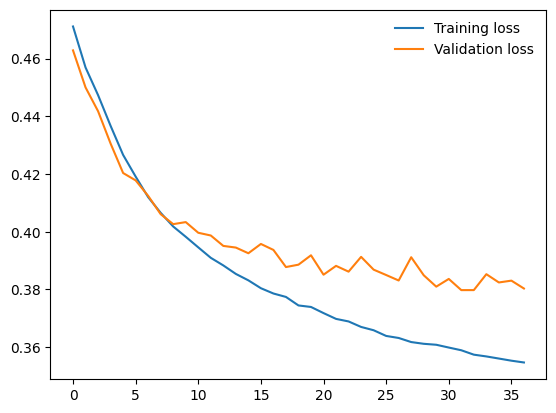

In [39]:
import copy
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt'):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
            verbose (bool): If True, prints a message for each validation loss improvement.
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
            path (str): Path for the checkpoint to be saved to.
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = float('inf')
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss


import torch 
import torch.nn as nn 
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
device = (
    "mps"
    if torch.backends.mps.is_built()
    else "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
X_train, X_test, y_train, y_test = train_test_split(X, y_res, test_size=0.2, random_state=42)
X_train = torch.tensor(X_train.values,dtype=torch.float32).to(device)
y_train = torch.tensor(y_train.values,dtype=torch.float32).to(device)
X_test = torch.tensor(X_test.values,dtype=torch.float32).to(device)
y_test = torch.tensor(y_test.values,dtype=torch.float32).to(device)
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
# train_dataset, test_dataset = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), int(len(dataset)*0.2)])
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 512), 
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32,10),
    nn.ReLU(),
    nn.Linear(10, 3),
    # nn.Softmax()
)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
early_stopping = EarlyStopping(patience=5, verbose=True)
train_losses = []
valid_losses = []
epochs = 1000
for epoch in range(epochs):
    train_loss = 0.0
    valid_loss = 0.0
    model.train()
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target.long())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
    train_loss = train_loss/len(train_loader.dataset)
    train_losses.append(train_loss)
    model.eval()
    for data, target in test_loader:
        output = model(data)
        loss = criterion(output, target.long())
        valid_loss += loss.item()*data.size(0)
    valid_loss = valid_loss/len(test_loader.dataset)
    valid_losses.append(valid_loss)
    print('Epoch: {}/{} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch+1, epochs, train_loss, valid_loss))
    early_stopping(valid_loss, model)
    if early_stopping.early_stop:
        print("Early stopping")
        break
import matplotlib.pyplot as plt
plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()